In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, r2_score,confusion_matrix, plot_confusion_matrix, classification_report,f1_score
from sklearn.model_selection import KFold
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


In [38]:
df = pd.read_csv('Dry_Bean_Dataset.csv')
# print(df)
display(df)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [39]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [40]:
df.shape

(13611, 17)

In [41]:
df.isna().sum()
#check missing values

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [42]:
print(set(df["Class"].values))

{'CALI', 'SEKER', 'SIRA', 'BARBUNYA', 'BOMBAY', 'DERMASON', 'HOROZ'}


DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64


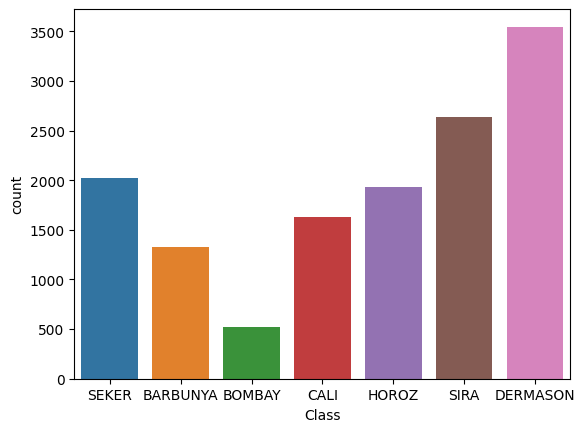

In [43]:
print(df['Class'].value_counts())
_ = sns.countplot(x='Class', data=df)

Use F1 micro -Score instead of accuracy because of uneven class labels distribution (the BOMBAY beans have a low number of instances, so the chance that this kind of beans is missclassified is high). (explain why micro)

Choose a test size of 20% (why)


We train the data with decision tree without hyperparameter tuning or cross validation first to see how high the train and test score.

In [44]:
#train decision tree without hyperparameter tuning or cross validation
# df = shuffle(df)

X = df.drop(["Class"], axis=1)
y = df["Class"]
# print(X)
# print(y)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=42, stratify=y)
# k=16
# feature_selector = SelectKBest(chi2, k=k)
# X_train = feature_selector.fit_transform(X_train, y_train)
# X_test = feature_selector.transform(X_test)



# print(feature_selector.get_feature_names_out())

In [45]:
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
# print(dt.score(X_train, y_train))
# print(dt.score(X_test, y_test))
# results = cross_validate(estimator=dt,
#                         X=X_train,
#                         y=y_train,
#                         cv=KFold(n_splits=5),
#                         scoring ='f1_micro',
#                         return_train_score=True)
# print("{} accuracy with a standard deviation of {}".format(results['train_score'].mean(), results['train_score'].std()/math.sqrt(10)))
# print("{} accuracy with a standard deviation of {}".format(results['test_score'].mean(), results['test_score'].std()/math.sqrt(10)))

print("Score before using hyperparameter tuning and cross-validation (Decision Tree): ")
print("Train F1_Score: ", f1_score(y_train, dt.predict(X_train), average='micro'))
print("Test F1_Score: ", f1_score(y_test, dt.predict(X_test), average='micro'))

Score before using hyperparameter tuning and cross-validation (Decision Tree): 
Train F1_Score:  1.0
Test F1_Score:  0.8927653323540213


Training score is 1.0 meanwhile test score is only around 0.88 -> the model is overfitting now. We will try to use cross-validation and try to find out the best model (highest validation score) with different parameters (using hyperparameter tuning). And also show test score of the test set.

Decision Tree:

All of these paramaters (max_depth, min_samples_split, and min_samples_leaf) try to limit the size of the tree -> just try one of them and use gini/entropy index as a second parameter

In [46]:
#Decision tree with F1 score
z=5 # 5 Fold cross-validation

pipe_dt = Pipeline([
    ("classify", tree.DecisionTreeClassifier())
])

# X_train_dt, X_test_dt, y_train_dt, y_test_dt = tts(X, y, test_size=0.20, random_state=42, stratify=y, shuffle =True) 
# X_train_dt, y_train_dt = X_train_dt[:5000], y_train_dt[:5000] #test with first 1000 samples
pg_dt = {
        'classify__min_samples_leaf': [5, 15,50,100],
        'classify__criterion': ['gini', 'entropy', 'log_loss']
        }
clf_dt = GridSearchCV(pipe_dt, param_grid =pg_dt,cv=z, scoring = "f1_micro", return_train_score=True)
# clf_dt = GridSearchCV(pipe_dt, param_grid =pg_dt,cv=z, return_train_score=True)
clf_dt.fit(X_train,y_train)

print("Best validation score: ") 
print(clf_dt.best_score_) #Score: F1 micro

print("Best parameters found: ")
print(clf_dt.best_params_)

# print("F1-Score on training set: ", clf_dt.score(X_train_dt, y_train_dt))
# print("F1-Score on test set: ", clf_dt.score(X_test_dt, y_test_dt))
# test_score_dt =  f1_score(y_test, clf_dt.predict(X_test), average='micro')

# # print("Train F1_Score: ", metrics.f1_score(y_train_dt, clf_dt.predict(X_train_dt), average='micro'))
# print("Test F1_Score: ", test_score_dt)

# print(pd.DataFrame(clf_dt.cv_results_))

Best validation score: 
0.9103590715692441
Best parameters found: 
{'classify__criterion': 'log_loss', 'classify__min_samples_leaf': 15}


In [47]:
test_score_dt =  f1_score(y_test, clf_dt.predict(X_test), average='micro')

# print("Train F1_Score: ", metrics.f1_score(y_train_dt, clf_dt.predict(X_train_dt), average='micro'))
print("Test F1_Score: ", test_score_dt)

Test F1_Score:  0.9122291590157914


c:\Users\nguye\anaconda3\envs\ml\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


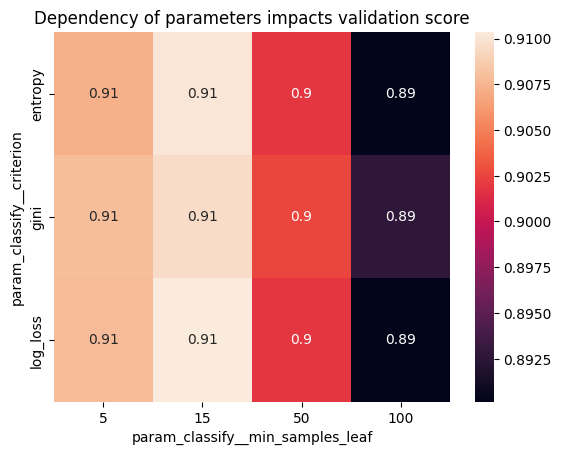

In [48]:
#parameters dependency impacts validation score
cv_results_dt = pd.DataFrame(clf_dt.cv_results_)
pivot = cv_results_dt.pivot(index='param_classify__criterion', columns='param_classify__min_samples_leaf', values='mean_test_score')
ax = sns.heatmap(pivot, annot=True)
ax.set_title("Dependency of parameters impacts validation score")
plt.show()

Try to explain the dependency of these parameters? and how it affect the validation score?

We decide to use confusion matrix to see which classes are being missclassified:

Text(0.5, 1.0, 'Confusion Matrix')

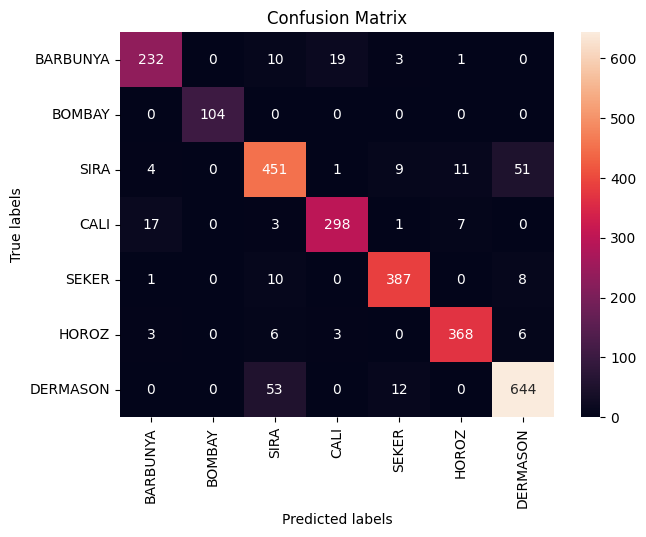

In [49]:
#Decision Tree dt
clf = clf_dt
# y_test = y_test_dt
# X_test = X_test_dt

y_pred = clf.predict(X_test)
labels=['BARBUNYA', 'BOMBAY', 'SIRA', 'CALI', 'SEKER', 'HOROZ', 'DERMASON']
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels),
                    index = [i for i in labels],
                    columns = [i for i in labels])
plt.figure(figsize = (7,5))
ax = sns.heatmap(df_cm, annot=True, fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [50]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    BARBUNYA       0.88      0.90      0.89       257
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.91      0.93      0.92       321
    DERMASON       0.91      0.91      0.91       709
       HOROZ       0.95      0.95      0.95       387
       SEKER       0.95      0.94      0.95       412
        SIRA       0.86      0.85      0.85       533

    accuracy                           0.91      2723
   macro avg       0.92      0.93      0.92      2723
weighted avg       0.91      0.91      0.91      2723



With the confusion matrix above we can see that SIRA and DERMASON are the most confused with eachother. So we will use AdaBoost to put weight more on these labels to try to get them predicted correctly.

? all of models need to explain why using those parameter to tune, how do the parameters affect the validation score of the model (e.g. higher then score higher but only until ect...)

In [51]:

ag_dt = AdaBoostClassifier(base_estimator= clf_dt.best_estimator_.steps[0][1])
pg_ag = {'learning_rate':[0.5, 1, 1.3]}
clf_ag = GridSearchCV(ag_dt, param_grid =pg_ag,cv=z, scoring = "f1_micro", return_train_score=True)
clf_ag.fit(X_train,y_train)

print("Best validation score: ") 
print(clf_ag.best_score_) #Score: F1 micro

print("Best parameters found: ")
print(clf_ag.best_params_)

test_score_ag =  f1_score(y_test, clf_ag.predict(X_test), average='micro')
# print("Train F1_Score: ", f1_score(y_train_dt, ag_dt.predict(X_train_dt), average='micro'))
print("Test F1_Score: ",test_score_ag)

Best validation score: 
0.9295552931916568
Best parameters found: 
{'learning_rate': 1.3}
Test F1_Score:  0.9214102093279471


Text(0.5, 1.0, 'Confusion Matrix')

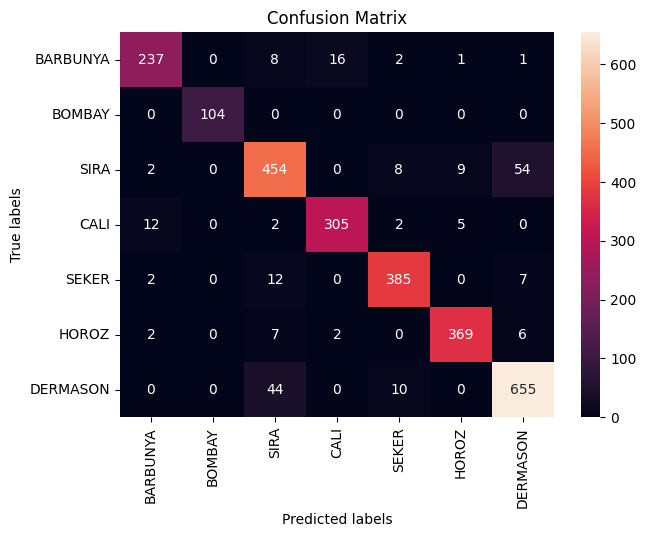

In [52]:
#AG dt
clf = clf_ag
# y_test = y_test_dt
# X_test = X_test_dt

y_pred = clf.predict(X_test)
labels=['BARBUNYA', 'BOMBAY', 'SIRA', 'CALI', 'SEKER', 'HOROZ', 'DERMASON']
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels),
                    index = [i for i in labels],
                    columns = [i for i in labels])
plt.figure(figsize = (7,5))
ax = sns.heatmap(df_cm, annot=True, fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

The score actually gets a bit higher from ... to ... (depends each time we run this file again) eventhough there are still many missclassified beans from these 2 classes. We can see from the picture of all the bean types (we will put picture of the bean in the report), they do really look very similar.  

In [53]:
# # cross validation only without hyperparameter tuning of AdaBoost
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_validate
# import numpy as np
# import math
# ag_dt = AdaBoostClassifier(base_estimator= clf_dt.best_estimator_.steps[0][1])
# # pg_ag = {'learning_rate':[0.4,0.5,0.6]}
# # clf_ag = GridSearchCV(ag_dt, param_grid =pg_ag,cv=z, scoring = "f1_micro", return_train_score=True)
# # # clf_dt = GridSearchCV(pipe_dt, param_grid =pg_dt,cv=z, return_train_score=True)

# # clf_ag.fit(X_train_dt,y_train_dt)

# # print("Best validation score: ") 
# # print(clf_ag.best_score_) #Score: F1 micro

# # print("Best parameters found: ")
# # print(clf_ag.best_params_)
# results = cross_validate(estimator=ag_dt,
#                         X=X_train_dt,
#                         y=y_train_dt,
#                         cv=KFold(n_splits=5),
#                         scoring ='f1_micro',
#                         return_train_score=True)
# print("%{} accuracy with a standard deviation of {}".format(results['train_score'].mean(), results['train_score'].std()/math.sqrt(10)))
# print("{} accuracy with a standard deviation of {}".format(results['test_score'].mean(), results['test_score'].std()/math.sqrt(10)))

In [54]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    BARBUNYA       0.89      0.93      0.91       255
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.94      0.94      0.94       323
    DERMASON       0.92      0.91      0.91       723
       HOROZ       0.96      0.96      0.96       384
       SEKER       0.95      0.95      0.95       407
        SIRA       0.86      0.86      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.94      0.93      2723
weighted avg       0.92      0.92      0.92      2723



In [55]:
# plot the report?

KNN

? why use kNN

kNN will have trouble when the dimensionality is high and also when the features are not ideally uncorrelated. So firstly, we will show the importance of features based on the DecisionTreeClassifier model above and secondly create a heatmap to see the correlation between all features. Then we will try to choose the less important features from the correlated features to reduce them.

Area, Score: 0.00022
Perimeter, Score: 0.04739
MajorAxisLength, Score: 0.31814
MinorAxisLength, Score: 0.14629
AspectRation, Score: 0.00127
Eccentricity, Score: 0.00117
ConvexArea, Score: 0.02504
EquivDiameter, Score: 0.00109
Extent, Score: 0.00384
Solidity, Score: 0.00892
roundness, Score: 0.04467
Compactness, Score: 0.16485
ShapeFactor1, Score: 0.19847
ShapeFactor2, Score: 0.00467
ShapeFactor3, Score: 0.01496
ShapeFactor4, Score: 0.01903


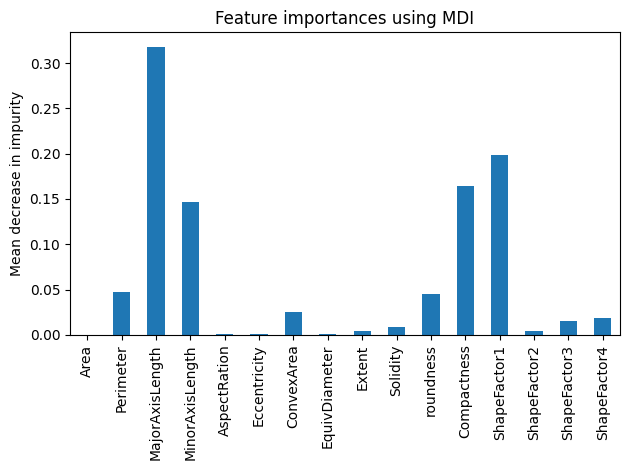

In [56]:
deci_tree = clf_dt.best_estimator_.steps[0][1]
importance = deci_tree.feature_importances_

#print out score of each feature
for i,v in enumerate(importance):
	print('%s, Score: %.5f' % (df.drop(["Class"], axis=1).columns[i],v))

#plotting
dt_importances = pd.Series(importance, index = df.drop(["Class"], axis=1).columns)#[i for i in set(df["Class"].values)])
fig, ax = plt.subplots()
# std = np.std([tree.feature_importances_ for tree in deci_tree.estimators_], axis=0)
dt_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

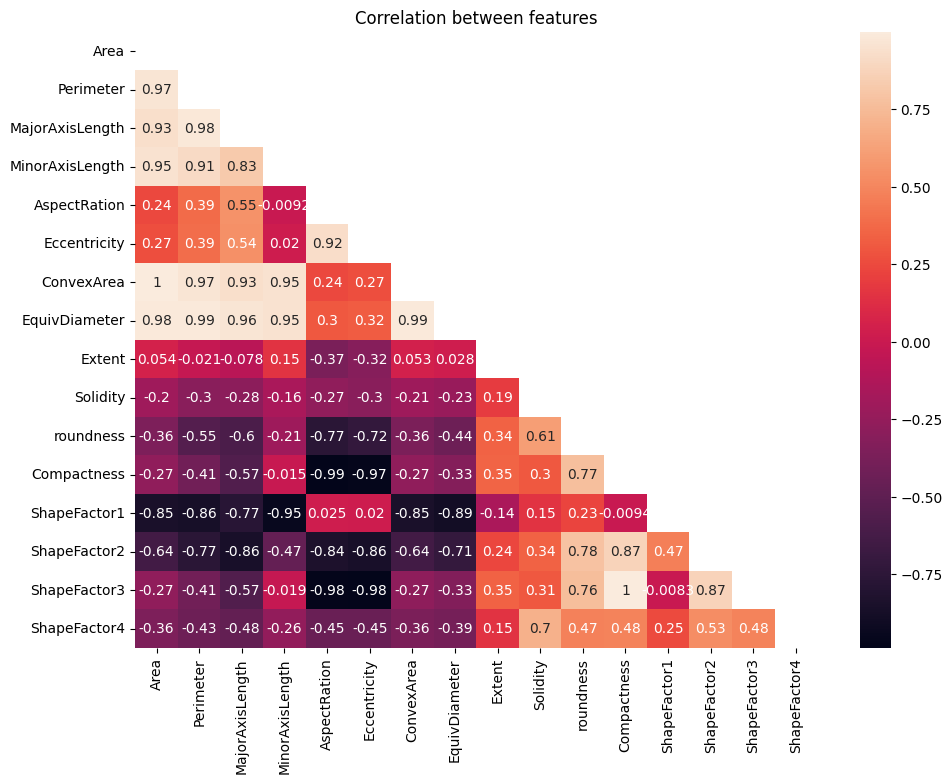

In [57]:

correlations_matrix = df.corr()
mask = np.zeros_like(correlations_matrix) 
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(11, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
ax.set_title("Correlation between features")
plt.show()


These features have correlation = 1 with each other, that means we can safely drop one of them:

- ConvexArea and Area
- ShapeFactor 3 and Compactness

The features below have correlation almost equal to -1 (-0.99,-0.98) and almost to 1 (0.99, 0.98), we can also choose to drop one of them or use PCA (in future work)

- EquivDiameter and Area
- EquivDiameter and Perimeter
- MajorAxisLength and Perimeter
- AspectRation and Compactness
- AspectRation and ShapeFactor 3
- Eccentricity and ShapeFactor 3
- ConvexArea and EquivDiameter

Steps:
- For the features that have correlation = 1 we can just choose any of them to drop, so we will keep the one that is more important than the other: ConvexArea and Compactness. That means Area, EquivDiameter, ShapeFactor 3 and AspectRation will be dropped.
- Between MajorAxisLength and Perimeter we will  drop Perimeter because of lower importance.

In [58]:

X2 = df.drop(['Area','EquivDiameter', 'ShapeFactor3', 'AspectRation', 'Perimeter', 'Class'], axis=1)
print(X2.shape)

(13611, 11)


To scale the data before training with kNN model, we decided to use MinMaxScaler because k-NN uses the Euclidean distance. In order for all of the features to be of equal importance when calculating the distance, the features must have the same range of values. This is only achievable through normalization.

We will use three hyperparamters- n-neighbors, weights and metric.

- n_neighbors: Decide the best k 
- weights: Check whether adding weights to the data points is beneficial to the model or not. 'uniform' assigns no weight, while 'distance' weighs points by the inverse of their distances meaning nearer points will have more weight than the farther points.


In [59]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = tts(X2, y, test_size=0.20, random_state=42, stratify=y, shuffle=True) 

In [60]:
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = Pipeline([
    ("scaler", MinMaxScaler()),
    ("classify", KNeighborsClassifier()) # What params?
])

pg_knn={"classify__n_neighbors":[20, 21, 19],
        'classify__weights' : ['uniform','distance']
        # 'classify__metric' : ['minkowski','euclidean','manhattan'] because already default the best
        }
clf_knn=GridSearchCV(pipe_knn,param_grid = pg_knn,cv=z, scoring = "f1_micro", return_train_score=True)
clf_knn.fit(X_train_knn,y_train_knn)

print("Best score: ")
print(clf_knn.best_score_)

print("Best parameters found: ")
print(clf_knn.best_params_)

# test_score_knn =  f1_score(y_test_knn, clf_knn.predict(X_test_knn), average='micro')
# print("Test F1_Score: ", test_score_knn)

# print("F1-Score on training set: ", clf_knn.score(X_train_knn, y_train_knn))
# print("F1-Score on test set: ", clf_knn.score(X_test_knn, y_test_knn))

# print(pd.DataFrame(clf_knn.cv_results_))

Best score: 
0.9265251588841183
Best parameters found: 
{'classify__n_neighbors': 21, 'classify__weights': 'distance'}


In [61]:
test_score_knn =  f1_score(y_test_knn, clf_knn.predict(X_test_knn), average='micro')
print("Test F1_Score: ", test_score_knn)

Test F1_Score:  0.9159015791406537


!!change the range of parameter to be around the best one

c:\Users\nguye\anaconda3\envs\ml\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


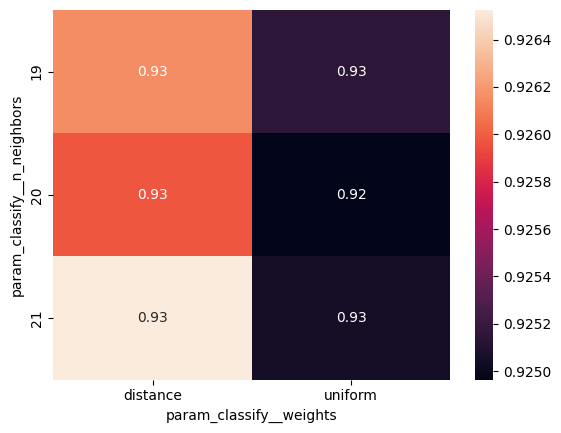

In [62]:
#parameters dependency
clf = clf_knn

cv_results_knn = pd.DataFrame(clf.cv_results_)
pivot_knn = cv_results_knn.pivot(index='param_classify__n_neighbors', columns='param_classify__weights', values='mean_test_score')
ax_knn = sns.heatmap(pivot_knn, annot=True)
ax.set_title("Dependency of parameters impacts validation score")
plt.show()


Text(0.5, 1.0, 'Confusion Matrix')

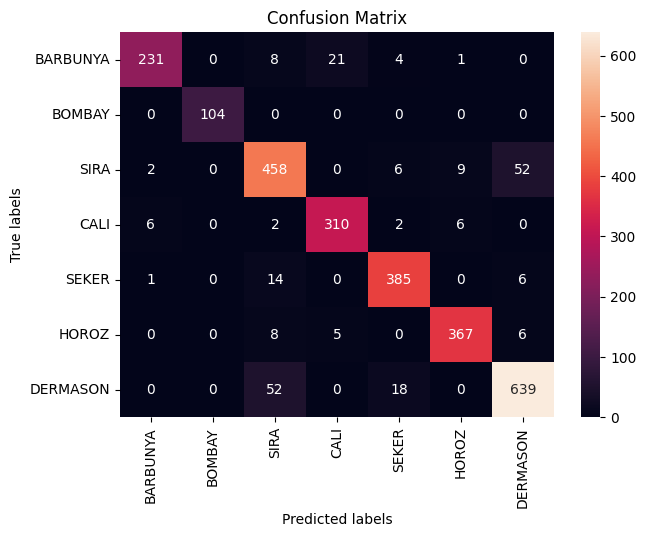

In [63]:
#confusion matrix to see which class are most uncorrect predicted
clf = clf_knn
# y_test = y_test_knn
# X_test = X_test_knn

y_pred = clf.predict(X_test_knn)
labels=['BARBUNYA', 'BOMBAY', 'SIRA', 'CALI', 'SEKER', 'HOROZ', 'DERMASON']
df_cm = pd.DataFrame(confusion_matrix(y_test_knn, y_pred, labels=labels),
                    index = [i for i in labels],
                    columns = [i for i in labels])
plt.figure(figsize = (7,5))
ax = sns.heatmap(df_cm, annot=True, fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 

In [64]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    BARBUNYA       0.87      0.96      0.91       240
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.95      0.92      0.94       336
    DERMASON       0.90      0.91      0.91       703
       HOROZ       0.95      0.96      0.95       383
       SEKER       0.95      0.93      0.94       415
        SIRA       0.87      0.85      0.86       542

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



SVM

In [65]:
# #SVM
# ##############wrong?????
# from sklearn.svm import SVC
# from sklearn.multiclass import OneVsOneClassifier
# # clf=OneVsOneClassifier(SVC(kernel='rbf',gamma = 0.1,C=2.5))
# z=5


# pipe_svm = Pipeline([
#     ("scaler", StandardScaler()), #SVM needs scaler
#     # ("features", SelectKBest(chi2)),
#     ("classify", OneVsOneClassifier(SVC()))
# ])

# X_train_svm, X_test_svm, y_train_svm, y_test_svm = tts(X, y, test_size=0.20, random_state=42, stratify=y, shuffle =True) 
# pg_svm = {'classify__estimator__C': [1 , 10 , 50,100],
#     'classify__estimator__kernel': ['rbf', 'linear'],
#     'classify__estimator__gamma': ['auto', 'scale',1e-3,1e-4]}
# clf_svm = GridSearchCV(pipe_svm, param_grid =pg_svm,cv=z, scoring = "f1_micro", return_train_score=True)
# # clf_svm = GridSearchCV(pipe_svm, param_grid =pg_svm,cv=z, return_train_score=True)
# clf_svm.fit(X_train_svm,y_train_svm)

# print("Best score: ") 
# print(clf_svm.best_score_) #Score: F1 micro

# print("Best parameters found: ")
# print(clf_svm.best_params_)


# print("F1-Score on training set: ", clf_svm.score(X_train_svm, y_train_svm))
# print("F1-Score on test set: ", clf_svm.score(X_test_svm, y_test_svm))

# # print("Train F1_Score: ", metrics.f1_score(y_train_dt, clf_dt.predict(X_train_dt), average='micro'))
# # print("Test F1_Score: ", metrics.f1_score(y_test_dt, clf_dt.predict(X_test_dt), average='micro'))

# print(pd.DataFrame(clf_svm.cv_results_))

In [76]:
# more correct??
#SVM
from sklearn.svm import SVC

pipe_svm = Pipeline([
    ("scaler", StandardScaler()), #SVM needs scaler????
    # ("features", SelectKBest(chi2)),
    ("classify", SVC(decision_function_shape='ovo'))
])

# X_train_svm, X_test_svm, y_train_svm, y_test_svm = tts(X, y, test_size=0.20, random_state=42, stratify=y, shuffle =True) 
pg_svm = {'classify__C': [1 , 10],
    # 'classify__kernel': ['rbf', 'linear'], #  # best = default
    'classify__gamma': ['auto', 'scale']}
clf_svm = GridSearchCV(pipe_svm, param_grid =pg_svm,cv=5, scoring = "f1_micro", return_train_score=True)
# clf_svm = GridSearchCV(pipe_svm, param_grid =pg_svm,cv=z, return_train_score=True)
clf_svm.fit(X_train,y_train)

print("Best score: ") 
print(clf_svm.best_score_) #Score: F1 micro

print("Best parameters found: ")
print(clf_svm.best_params_)

# test_score_svm =  f1_score(y_test, clf_dt.predict(X_test), average='micro')

# # print("Train F1_Score: ", metrics.f1_score(y_train_dt, clf_dt.predict(X_train_dt), average='micro'))
# print("Test F1_Score: ", test_score_svm)


Best score: 
0.9332294001104291
Best parameters found: 
{'classify__C': 10, 'classify__gamma': 'auto'}


In [77]:
test_score_svm =  f1_score(y_test, clf_svm.predict(X_test), average='micro')

# print("Train F1_Score: ", metrics.f1_score(y_train_dt, clf_dt.predict(X_train_dt), average='micro'))
print("Test F1_Score: ", test_score_svm)

Test F1_Score:  0.9243481454278369


Text(0.5, 1.0, 'Confusion Matrix')

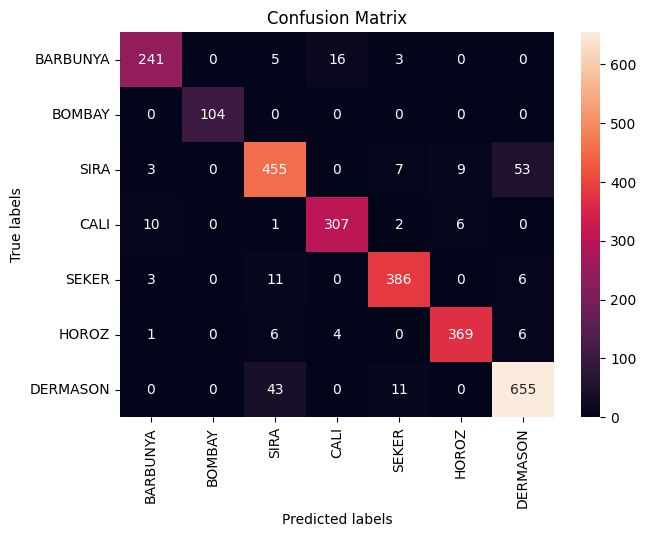

In [78]:
#SVM confusion matrix
clf = clf_svm
# y_test = y_test_svm
# X_test = X_test_svm

y_pred = clf.predict(X_test)
labels=['BARBUNYA', 'BOMBAY', 'SIRA', 'CALI', 'SEKER', 'HOROZ', 'DERMASON']
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred, labels=labels),
                    index = [i for i in labels],
                    columns = [i for i in labels])
plt.figure(figsize = (7,5))
ax = sns.heatmap(df_cm, annot=True, fmt='d')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix') 

c:\Users\nguye\anaconda3\envs\ml\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


Text(0.5, 1.0, 'Dependency of parameters impacts validation score')

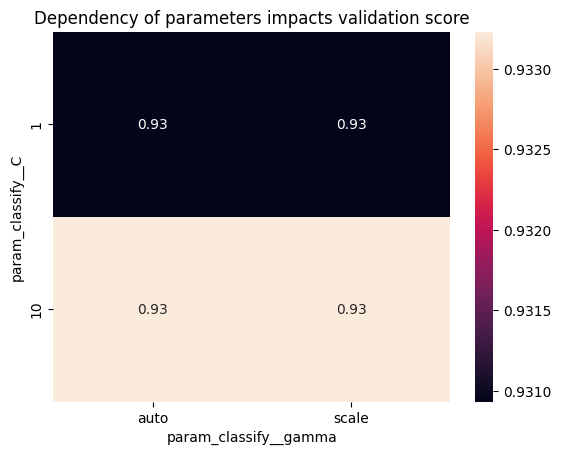

In [79]:
#parameters dependency
cv_results_svm = pd.DataFrame(clf_svm.cv_results_)
# display(cv_results_dt)
pivot_svm = cv_results_svm.pivot(index='param_classify__C', columns='param_classify__gamma', values='mean_test_score')
ax = sns.heatmap(pivot_svm, annot=True)
ax.set_title("Dependency of parameters impacts validation score")
# plt.show()

In [80]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    BARBUNYA       0.91      0.93      0.92       258
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.94      0.94      0.94       327
    DERMASON       0.92      0.91      0.92       720
       HOROZ       0.96      0.96      0.96       384
       SEKER       0.95      0.94      0.95       409
        SIRA       0.86      0.87      0.87       521

    accuracy                           0.92      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.92      0.92      0.92      2723



In [81]:
#plot all the test_score of everything??

In [82]:
test_scores = [["DecisionTree", test_score_dt],["AdaBoost", test_score_ag],["kNN", test_score_knn],["SVC", test_score_svm]]
test_scores_df = pd.DataFrame(test_scores, columns = ['Model', 'Test Score'])
display(test_scores_df)

,Model,Test Score
0,DecisionTree,0.912229
1,AdaBoost,0.921410
2,kNN,0.915902
3,SVC,0.924348


- Make a lineplot for above? (to show which one with best test score)
- Future work: use PCA for dimension reduction instead of removing columns ourself; use Neuron Network to train

In [84]:
# #wrong?
# from sklearn.svm import SVC
# from sklearn.multiclass import OneVsOneClassifier
# # clf=OneVsOneClassifier(SVC(kernel='rbf',gamma = 0.1,C=2.5))
# z=5


# pipe_svm = Pipeline([
#     ("scaler", StandardScaler()), #SVM needs scaler
#     # ("features", SelectKBest(chi2)),
#     ("classify", OneVsOneClassifier(SVC()))
# ])

# # X_train_svm, X_test_svm, y_train_svm, y_test_svm = tts(X, y, test_size=0.20, random_state=42, stratify=y, shuffle =True) 
# pg_svm = {'classify__estimator__C': [1 , 10 , 50],
#     'classify__estimator__kernel': ['rbf', 'linear'],
#     'classify__estimator__gamma': ['auto', 'scale']}
# clf_svm2 = GridSearchCV(pipe_svm, param_grid =pg_svm,cv=z, scoring = "f1_micro", return_train_score=True)
# # clf_svm = GridSearchCV(pipe_svm, param_grid =pg_svm,cv=z, return_train_score=True)
# clf_svm2.fit(X_train,y_train)

# print("Best score: ") 
# print(clf_svm2.best_score_) #Score: F1 micro

# print("Best parameters found: ")
# print(clf_svm2.best_params_)


# print("F1-Score on training set: ", clf_svm2.score(X_train, y_train))
# print("F1-Score on test set: ", clf_svm2.score(X_test, y_test))

# # print("Train F1_Score: ", metrics.f1_score(y_train_dt, clf_dt.predict(X_train_dt), average='micro'))
# # print("Test F1_Score: ", metrics.f1_score(y_test_dt, clf_dt.predict(X_test_dt), average='micro'))

# print(pd.DataFrame(clf_svm2.cv_results_))